<a href="https://colab.research.google.com/github/HakeemYB/cv-project/blob/main/cv_module_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/data/image'

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
!7za -y x "/content/drive/MyDrive/Colab Notebooks/data/image/origin.7z.*"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Colab Notebooks/data/image/                                                            8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/Colab Notebooks/data/image/origin.7z.001
--
Path = /content/drive/MyDrive/Colab Notebooks/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/processed_data"
!cp -r ./origin "/content/drive/MyDrive/Colab Notebooks/processed_data/"

In [2]:
import numpy as np
import os
import glob
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [3]:
image_dir = "/content/drive/MyDrive/Colab Notebooks/processed_data/origin"

Total images:  39852


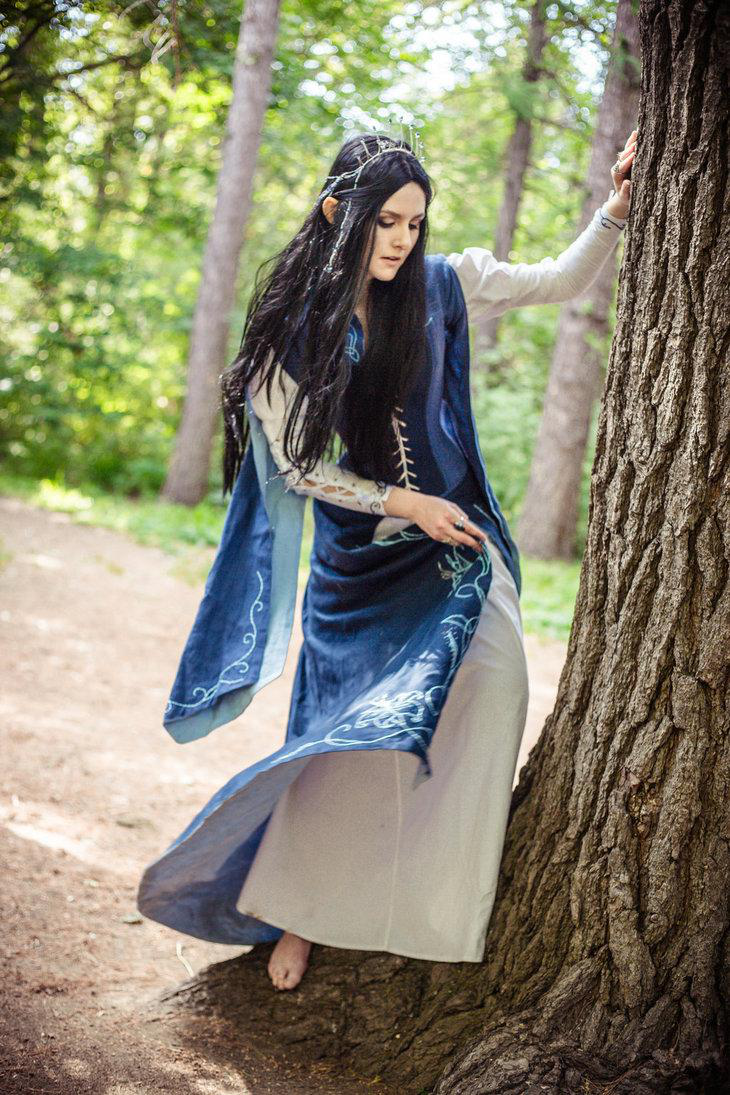

In [5]:
image_count = len(list(glob.glob(os.path.join(image_dir, '*.jpg'))))
print("Total images: ", image_count)
images = list(glob.glob(os.path.join(image_dir, '*.jpg')))
PIL.Image.open(str(images[0]))

In [6]:
labels_file = "/content/drive/MyDrive/Colab Notebooks/data/label/label.lst"
df = pd.read_csv(labels_file, header=None, delimiter = " ", names=["image_name", "face_id_in_image", "face_box_top", "face_box_right", "face_box_bottom", "face_box_cofidence", "expression_label"])


In [7]:
df.head()

image_name  face_id_in_image  face_box_top  \
angry_actor_104.jpg           0                28           113   
angry_actor_109.jpg           0                31           157   
angry_actor_120.jpg           1                53            53   
angry_actor_13.jpg            0                77            51   
angry_actor_132.jpg           0                95            31   

                     face_box_right  face_box_bottom  face_box_cofidence  \
angry_actor_104.jpg             226              141             22.9362   
angry_actor_109.jpg             345              219             50.3056   
angry_actor_120.jpg             372              372             13.9434   
angry_actor_13.jpg              362              388             85.8104   
angry_actor_132.jpg             412              476             82.3948   

                     expression_label  
angry_actor_104.jpg                 0  
angry_actor_109.jpg                 0  
angry_actor_120.jpg                 2  
angry_actor_13.jpg                  3  
angry_actor_132.jpg                 0

In [8]:
labels = ["angry", "disgust", "fear", "happy", "sad", "surprize", "neutral"]

In [12]:
file_paths = df['image_name']
labels = df['expression_label']
list_ds = tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/Colab Notebooks/processed_data/", '*/*'), shuffle=False)

In [13]:
batch_size = 32
img_height = 180
img_width = 180